In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df['ID'].nunique()

29687

In [6]:
df.shape

(30000, 25)

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head()

af1e3f79-f628    2
9d3d2a55-dab6    2
d9dafe9c-b497    2
5795a795-bfa0    2
77222291-e191    2
Name: ID, dtype: int64

In [8]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [9]:
np.random.seed(seed=24)


In [10]:
random_integers = np.random.randint(low=1,high=5,size=100)


In [11]:
is_equal_to_3 = random_integers == 3


In [12]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [13]:
sum(is_equal_to_3)


22

In [14]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [15]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

af1e3f79-f628    True
9d3d2a55-dab6    True
d9dafe9c-b497    True
5795a795-bfa0    True
77222291-e191    True
Name: ID, dtype: bool

In [16]:
id_counts.index[0:5]

Index(['af1e3f79-f628', '9d3d2a55-dab6', 'd9dafe9c-b497', '5795a795-bfa0',
       '77222291-e191'],
      dtype='object')

In [17]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [18]:
dupe_ids[0:5]

['af1e3f79-f628',
 '9d3d2a55-dab6',
 'd9dafe9c-b497',
 '5795a795-bfa0',
 '77222291-e191']

In [19]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3999,9d3d2a55-dab6,170000,1,2,2,39,-1,-1,-1,0,...,316,6131,5612,8077,4380,0,6131,0,3000,1
4099,9d3d2a55-dab6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10956,d9dafe9c-b497,80000,2,2,1,35,0,0,0,0,...,5275,0,316,1250,1200,1000,0,316,31002,0
11056,d9dafe9c-b497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24726,af1e3f79-f628,150000,1,3,2,42,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
24826,af1e3f79-f628,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_zero_mask = df == 0


In [21]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

In [22]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [23]:
df_clean_1['ID'].nunique()


29685

In [24]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
df_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [26]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [27]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [28]:
df_clean_2.shape

(26664, 25)

In [29]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [30]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [31]:
import matplotlib.pyplot as plt #import plotting package
 
#render plotting automatically
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>]], dtype=object)

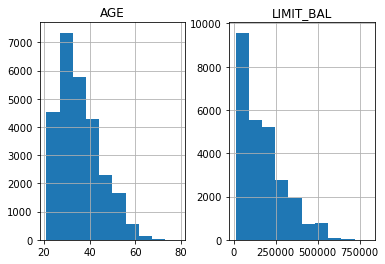

In [32]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [33]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [34]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [35]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [36]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [37]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

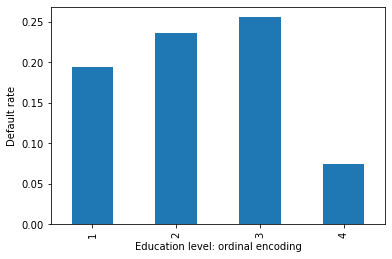

In [38]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [39]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [40]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [41]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [42]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [43]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [44]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [45]:

df_with_ohe.to_csv('cleaned_data.csv', index=False)


In [46]:
df = pd.read_csv('cleaned_data.csv')

In [47]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [49]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [50]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

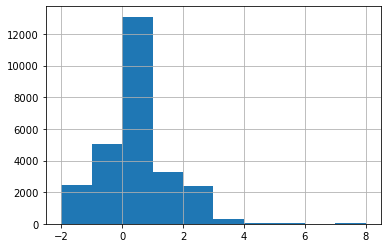

In [51]:
df[pay_feats[0]].hist()

In [52]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

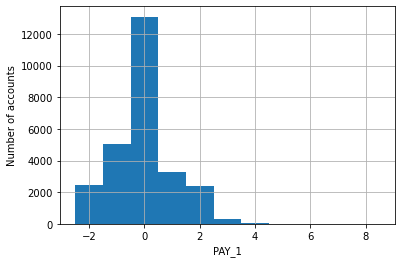

In [53]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

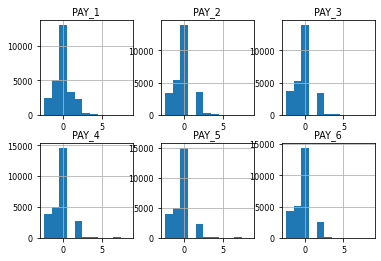

In [57]:
mpl.rcParams['font.size'] = 8
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [58]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
